# Airbnb Housing in Seattle

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Business Understanding](#0)<br>
2. [Data Understanding](#2)<br>
3. [Data Preparation](#4)<br>
4. [Data Visualization](#6)<br>
5. [Predictive Modelling for Price Prediction](#8)<br>
6. [Model Evaluation](#10)<br>
7. [Conclusion](#12) <br>
</div>
<hr>

# Business Understanding<a id="0"></a>
### Basic price study for Airbnb housing in Seattle to address the followings:<br>
1. When is the high season in terms accomodation price
2. Which neighborhoods are more pricy to stay
3. Predict the housing price using the avilable data


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.options.display.max_rows = 4000

# Data Understanding<a id="2"></a>
### "Airbnb Seattle Calendar" Dataset, "Airbnb Boston Calendar" Dataset, and "Airbnb Seattle Listings" Dataset

In [101]:
# Data Gathering

#"Airbnb Seattle Calendar" Dataset
Sea_Cal = pd.read_csv('C:/Users/DCOMP/Desktop/Udacity/Data Science/Airb&b_blogPost/Seattle_Airb&b/calendar.csv')

#"Airbnb Boston Calendar" Dataset
Bos_Cal = pd.read_csv('C:/Users/DCOMP/Desktop/Udacity/Data Science/Airb&b_blogPost/Boston_Airb&b/calendar.csv')

#"Airbnb Seattle Listings" Dataset
Sea_List = pd.read_csv('C:/Users/DCOMP/Desktop/Udacity/Data Science/Airb&b_blogPost/Seattle_Airb&b/listings.csv')

### "Airbnb Seattle Calendar" Dataset

In [102]:
#"Airbnb Seattle Calendar" Dataset columns
Sea_Cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [103]:
Sea_Cal.date.max(),Sea_Cal.date.min()
#"Airbnb Seattle Calendar" Dataset data time span is for 2016

('2017-01-02', '2016-01-04')

In [104]:
#"Airbnb Seattle Calendar" Dataset shape
Sea_Cal.shape

(1393570, 4)

In [105]:
# "Airbnb Seattle Calendar" Dataset: percentage of null values in each column, only "price" has null values
Sea_Cal.isnull().sum()/Sea_Cal.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

### "Airbnb Boston Calendar" Dataset

In [106]:
#"Airbnb Boston Calendar" Dataset shape
Bos_Cal.shape

(1308890, 4)

In [107]:
#"Airbnb Boston Calendar" Dataset shape: percentage of null values in each column, only "price" has null values
Bos_Cal.isnull().sum()/Bos_Cal.shape[0]

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

### "Airbnb Seattle Listings" Dataset

In [108]:
#"Airbnb Seatle Listing" Dataset shape
Sea_List.shape

(3818, 92)

In [109]:
#"Airbnb Seatle Listing" Dataset 
Sea_List.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [110]:
#"Airbnb Seatle Listing" Dataset, prie column has no missing value 
Sea_List.price.isnull().sum()

0

# Data Preparation<a id="4"></a>

### "Airbnb Seattle Calendar" Dataset

In [111]:
# since we are interested in the price, drop the rows with no price value 
Sea_Cal_Avail = Sea_Cal.dropna(subset=["price"])

In [112]:
# extract the "month" from the date column for price/month analysis and add a new column "month" to the data frame
Sea_Cal_Avail['month'] = pd.DatetimeIndex(Sea_Cal_Avail['date']).month
Sea_Cal['month'] = pd.DatetimeIndex(Sea_Cal['date']).month

Sea_Cal_Avail.head()

C:\Users\DCOMP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
9,241032,2016-01-13,t,$85.00,1
10,241032,2016-01-14,t,$85.00,1
14,241032,2016-01-18,t,$85.00,1


In [113]:
# columns data types
Sea_Cal_Avail.dtypes

listing_id     int64
date          object
available     object
price         object
month          int64
dtype: object

In [114]:
# price column should be numeric not object: so drop the symbols and punctuation marks and convert "price" column to numeric type
b=[]
for i in Sea_Cal_Avail.price:
    temp = (i.replace("$",""))
    b.append(temp.replace(",",""))

Sea_Cal_Avail.price = pd.to_numeric(b)

### "Airbnb Boston Calendar" Dataset

In [115]:
# since we are interested in the price, drop the rows with no price value 
Bos_Cal_Avail = Bos_Cal.dropna(subset=["price"])

In [116]:
# extract the "month" from the date column for price/month analysis and add a new column "month" to the data frame
Bos_Cal_Avail['month'] = pd.DatetimeIndex(Bos_Cal_Avail['date']).month
Bos_Cal['month'] = pd.DatetimeIndex(Bos_Cal['date']).month

Bos_Cal_Avail.head()

C:\Users\DCOMP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,date,available,price,month
365,3075044,2017-08-22,t,$65.00,8
366,3075044,2017-08-21,t,$65.00,8
367,3075044,2017-08-20,t,$65.00,8
368,3075044,2017-08-19,t,$75.00,8
369,3075044,2017-08-18,t,$75.00,8


In [117]:
# columns data types
Bos_Cal_Avail.dtypes

listing_id     int64
date          object
available     object
price         object
month          int64
dtype: object

In [118]:
# price column should be numeric not object: so drop the symbols and punctuation marks and convert "price" column to numeric type
b=[]
for i in Bos_Cal_Avail.price:
    temp = (i.replace("$",""))
    b.append(temp.replace(",",""))

Bos_Cal_Avail.price = pd.to_numeric(b)

### "Airbnb Seattle Listings" Dataset

In [119]:
# columns data types
Sea_List.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [120]:
# price column should be numeric not object: drop the symbols and punctuation marks and convert "price" column to numeric type
b=[]
for i in Sea_List.price:
    temp = (i.replace("$",""))
    b.append(temp.replace(",",""))

Sea_List.price = pd.to_numeric(b)

# Data Visualization<a id="6"></a>

### Exploratory Price/Month Analysis (Seattle)

In [121]:
# calculate the availability_rate/month in percentage
AvailPerMonth = list(Sea_Cal.available[Sea_Cal.available=='t'].groupby(Sea_Cal.month).value_counts())
OccupiedPerMonth = list(Sea_Cal.available[Sea_Cal.available=='f'].groupby(Sea_Cal.month).value_counts())
avail_perc =[i*100 /(i+j)  for i, j in zip(AvailPerMonth, OccupiedPerMonth)]

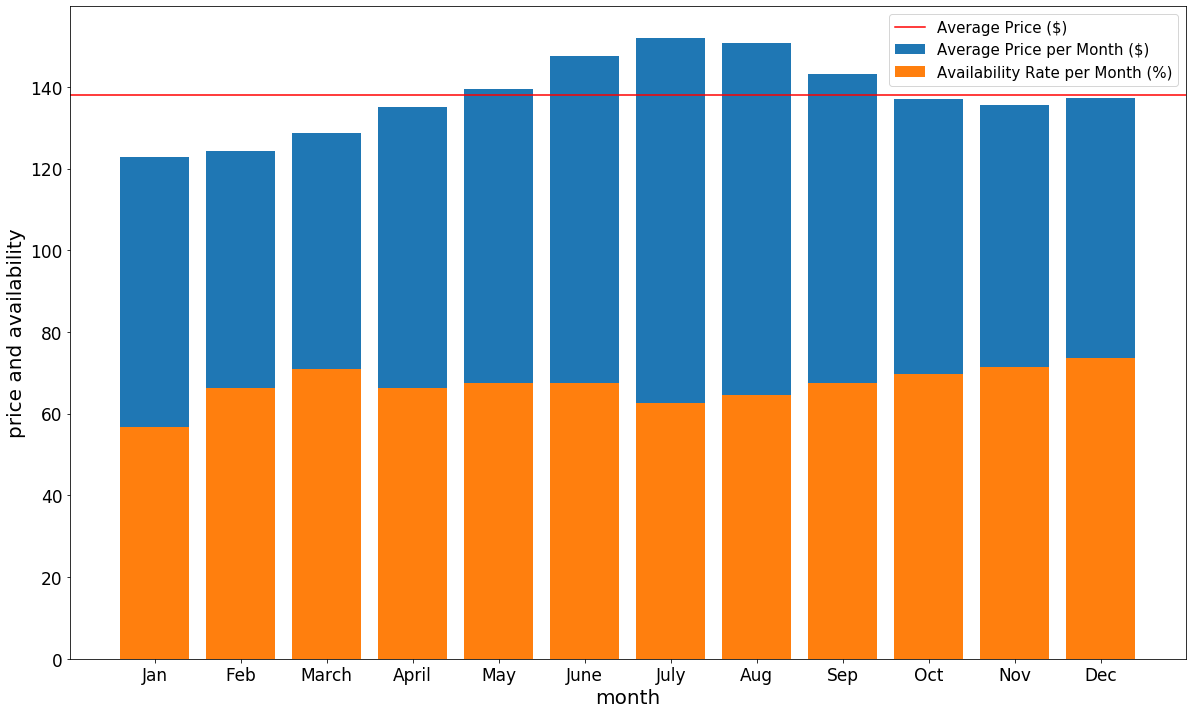

In [122]:
# calculate and plot the average_price/month, as well as availability_rate/month 
avg_price = Sea_Cal_Avail.price.groupby(Sea_Cal_Avail.month).mean()
months=["Jan","Feb","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"]
fig, ax = plt.subplots(figsize=(20,12))

ax.bar(months, avg_price,label='Average Price per Month ($)')
ax.bar(months, avail_perc,label='Availability Rate per Month (%)')
plt.axhline(y = Sea_Cal_Avail.price.mean(), color = 'r', linestyle = '-',label='Average Price ($)')
ax.set_xlabel('month',fontsize=20)
ax.set_ylabel('price and availability',fontsize=20)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.legend(fontsize=15)
plt.show()

In [123]:
# as seen in the plot above, the high season is June, July and August

### Exploratory Price/Month Analysis (Boston)

In [124]:
# calculate the availability_rate/month in percentage
AvailPerMonth = list(Bos_Cal.available[Bos_Cal.available=='t'].groupby(Bos_Cal.month).value_counts())
OccupiedPerMonth = list(Bos_Cal.available[Bos_Cal.available=='f'].groupby(Bos_Cal.month).value_counts())
avail_perc =[i*100 /(i+j)  for i, j in zip(AvailPerMonth, OccupiedPerMonth)]

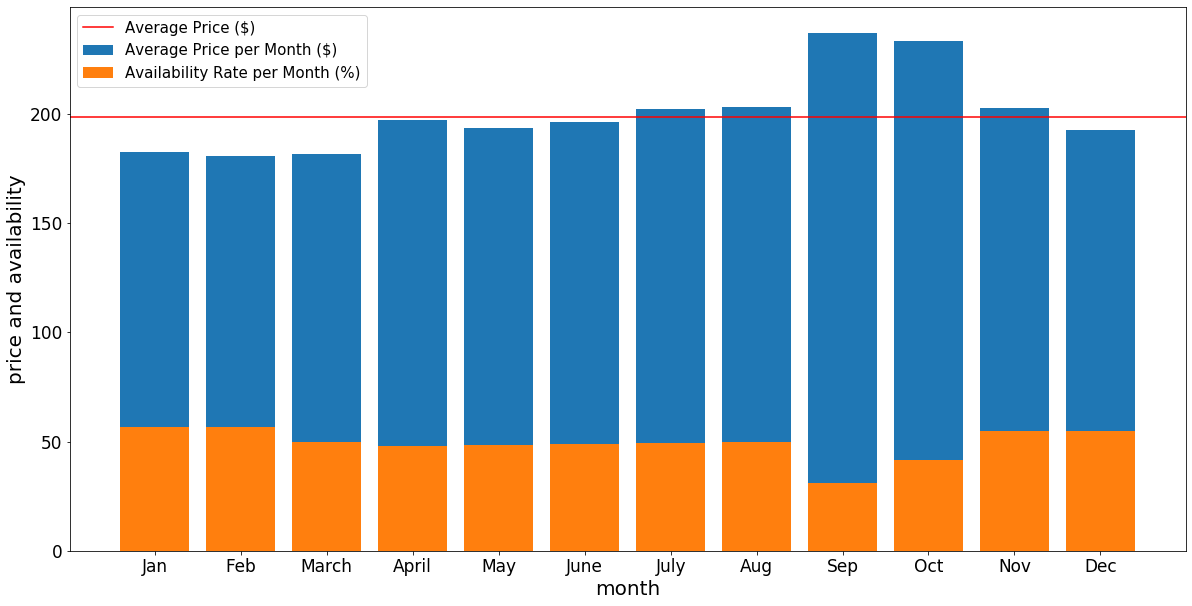

In [125]:
# calculate and plot the average_price/month, as well as availability_rate/month 
avg_price = Bos_Cal_Avail.price.groupby(Bos_Cal_Avail.month).mean()
months=["Jan","Feb","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"]
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(months, avg_price,label='Average Price per Month ($)')
ax.bar(months, avail_perc,label='Availability Rate per Month (%)')
plt.axhline(y = Bos_Cal_Avail.price.mean(), color = 'r', linestyle = '-',label='Average Price ($)')
ax.set_xlabel('month',fontsize=20)
ax.set_ylabel('price and availability',fontsize=20)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.legend(fontsize=15)
plt.show()

In [126]:
# as seen in the plot above, the high season is September and October

### Exploratory Price/Neighborhood Analysis (Seattle)

In [127]:
# total properties in each of the 87 Seattle neighborhoods
neighborhoods = Sea_List.neighbourhood_cleansed.value_counts()
neighborhoods

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Mann                          67
Ravenna                       67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
North Queen Anne              54
Green Lake                    54
Atlantic                      53
Leschi                        53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park                   44
Maple Leaf

In [128]:
# calculate the average price for each neighborhood
avg_neigh_price = Sea_List.price.groupby(Sea_List.neighbourhood_cleansed).mean()
avg_neigh_price

neighbourhood_cleansed
Adams                        121.671429
Alki                         171.619048
Arbor Heights                126.800000
Atlantic                     111.396226
Belltown                     162.893162
Bitter Lake                   83.000000
Briarcliff                   176.571429
Brighton                      91.230769
Broadview                     94.705882
Broadway                     123.889169
Bryant                       114.896552
Cedar Park                   114.625000
Central Business District    164.213592
Columbia City                 95.017241
Crown Hill                    87.666667
Dunlap                        88.300000
East Queen Anne              159.414634
Eastlake                     122.333333
Fairmount Park               128.931034
Fauntleroy                   164.100000
First Hill                   136.425926
Fremont                      129.056962
Gatewood                     124.318182
Genesee                      121.970588
Georgetown       

In [129]:
# reindex the neighborhoods, so it can be plotted with avg_neigh_price
neighborhoods = neighborhoods.reindex(avg_neigh_price.index)

In [130]:
# for better readibility in plotting:group into high price and low price
avg_neigh_Hiprice = avg_neigh_price[avg_neigh_price>=Sea_List.price.mean()]
neighborhoods_Hiprice = neighborhoods[avg_neigh_price>=Sea_List.price.mean()]

avg_neigh_Loprice = avg_neigh_price[avg_neigh_price<Sea_List.price.mean()]
neighborhoods_Loprice = neighborhoods[avg_neigh_price<Sea_List.price.mean()]

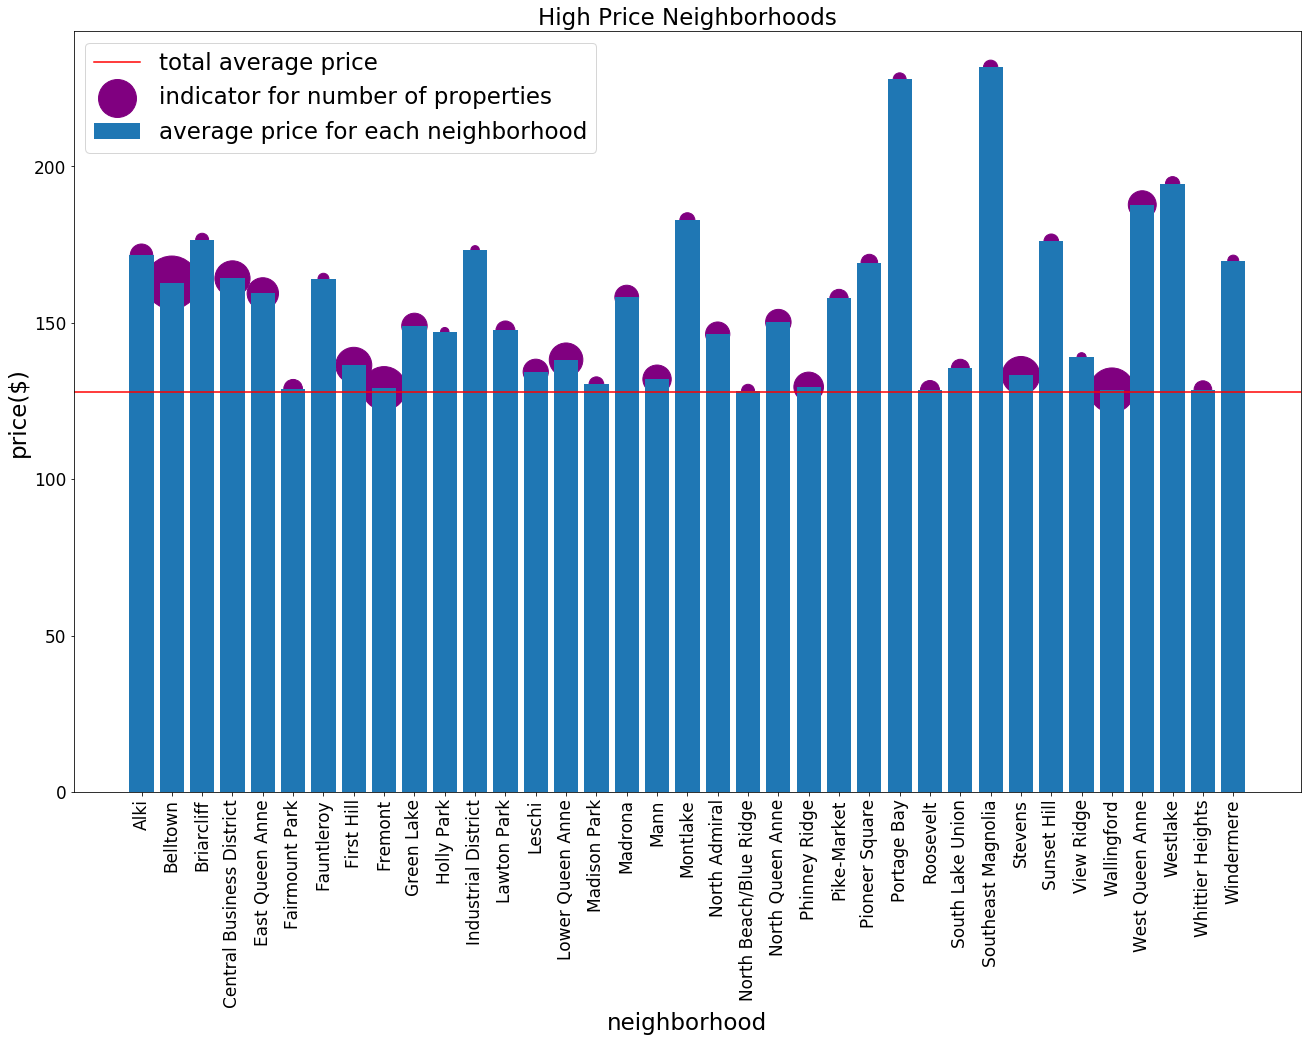

In [131]:
# plot the average price for each neighborhood (high price)
# bubbles are indicators for number of properties in that neighborhood 
fig, ax = plt.subplots(figsize=(22,14))

ax.scatter(x=avg_neigh_Hiprice.index, y=avg_neigh_Hiprice,
                 s=neighborhoods_Hiprice*12, c="purple",label='indicator for number of properties')
ax.bar(x=avg_neigh_Hiprice.index, height=avg_neigh_Hiprice,label='average price for each neighborhood')

plt.axhline(y = Sea_List.price.mean(), color = 'r', linestyle = '-',label='total average price')

ax.set_xticklabels(avg_neigh_Hiprice.index,rotation=90)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_xlabel('neighborhood',fontsize=23)
ax.set_ylabel('price($)',fontsize=23)
ax.set_title('High Price Neighborhoods',fontsize=23)

ax.legend(fontsize=23)
plt.show()

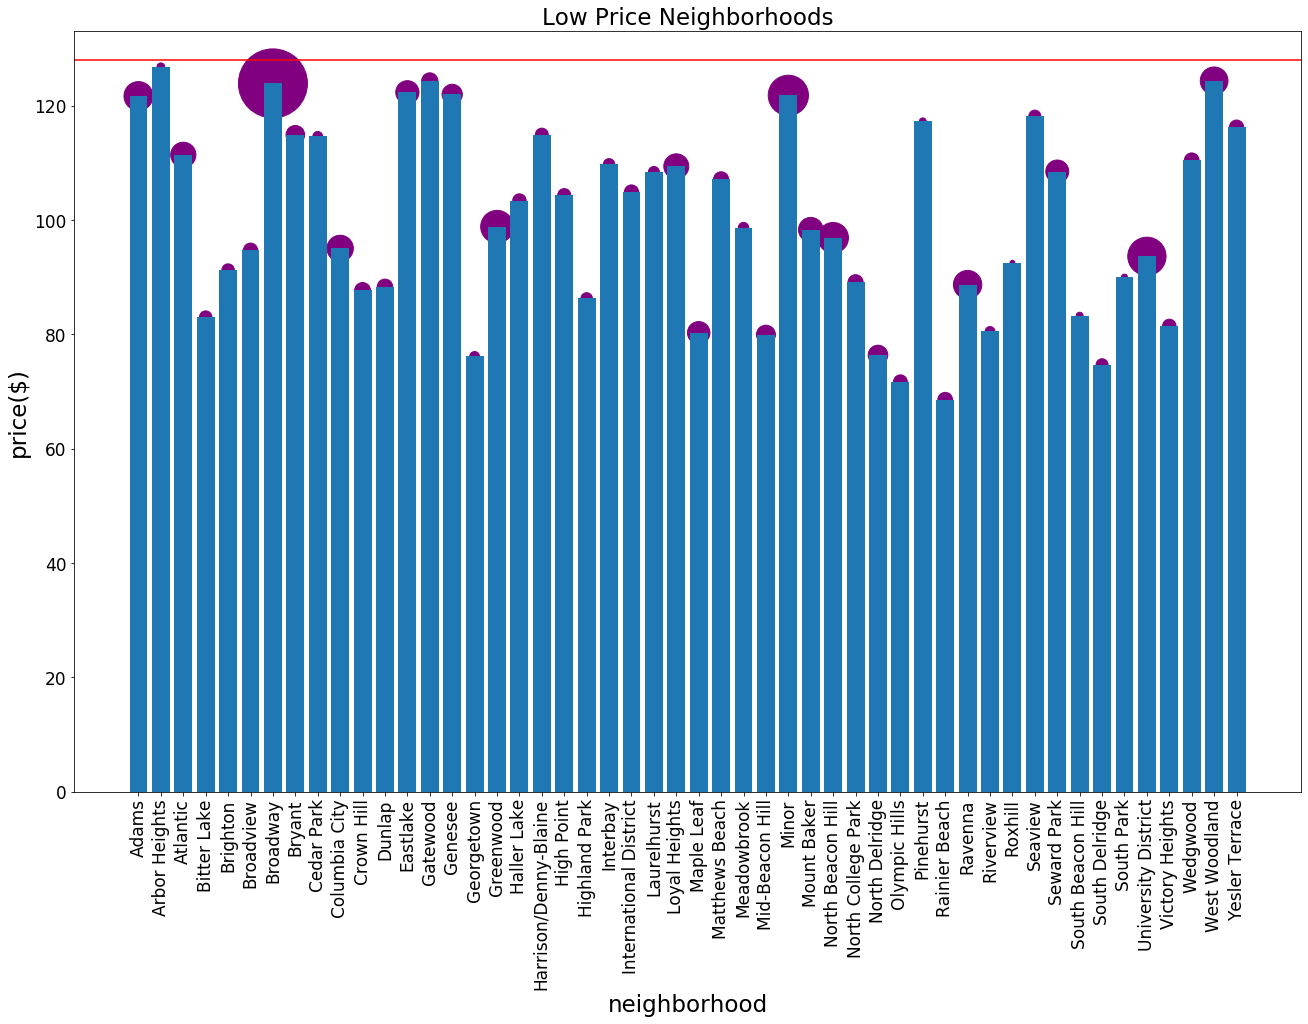

In [132]:
# plot the average price for each neighborhood (low price)
# bubbles are indicators for number of properties in that neighborhood 
fig, ax = plt.subplots(figsize=(22,14))

ax.scatter(x=avg_neigh_Loprice.index, y=avg_neigh_Loprice,
                 s=neighborhoods_Loprice*12, c="purple",label='indicator for number of properties')
ax.bar(x=avg_neigh_Loprice.index, height=avg_neigh_Loprice,label='average price for each neighborhood')

plt.axhline(y = Sea_List.price.mean(), color = 'r', linestyle = '-',label='average price')

ax.set_xticklabels(avg_neigh_Loprice.index,rotation=90)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_xlabel('neighborhood',fontsize=23)
ax.set_ylabel('price($)',fontsize=23)
ax.set_title('Low Price Neighborhoods',fontsize=23)


#ax.legend(fontsize=20)
plt.show()

In [133]:
# the above two plots summarizes the price/neighborhhod for Seattle

# Predictive Modelling for Price Prediction <a id="8"></a>

### Full Features

In [134]:
#select the features: ignore the "id", "urls" and the columns with lots of different text values
Sea_List_fFeat = Sea_List[["host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost","host_neighbourhood",
                         "host_listings_count","host_verifications","host_has_profile_pic","host_identity_verified","neighbourhood_cleansed",
                         "is_location_exact","property_type","room_type","accommodates","bathrooms","bedrooms",
                         "beds","bed_type","square_feet","price","security_deposit","cleaning_fee","guests_included","extra_people",
                         "minimum_nights","maximum_nights","number_of_reviews","review_scores_rating","review_scores_accuracy",
                         "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location",
                         "review_scores_value","requires_license","license","instant_bookable","cancellation_policy",
                         "require_guest_profile_picture","require_guest_phone_verification","reviews_per_month"]]

In [135]:
# check for the null values
Sea_List_fFeat.isnull().sum()

host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_listings_count                    2
host_verifications                     0
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_cleansed                 0
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
square_feet                         3721
price                                  0
security_deposit                    1952
cleaning_fee                        1030
guests_included                        0
extra_people                           0
minimum_nights  

In [136]:
# drop the columns with too many null values
Sea_List_fFeat = Sea_List_fFeat.drop(columns=['square_feet','security_deposit','cleaning_fee','license'])

In [137]:
# check the data types:
Sea_List_fFeat.dtypes

host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_neighbourhood                   object
host_listings_count                 float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                               float64
guests_included                       int64
extra_people                         object
minimum_nights                        int64
maximum_nights                  

In [138]:
# remove symbols and punctuation marks and convert to numeric for columns: 'host_response_rate','host_acceptance_rate','extra_people'
for colName in ['host_response_rate','host_acceptance_rate','extra_people']:
    for ind,i in enumerate(Sea_List_fFeat[colName]):
        if i != 'nan':
            temp = str(i).replace("$","")
            temp = temp.replace("%","")
            temp = temp.replace(",","")
            Sea_List_fFeat[colName][ind]  = float(temp)
            
    Sea_List_fFeat[colName] = pd.to_numeric( Sea_List_fFeat[colName])


C:\Users\DCOMP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
# extract the numeric columns and replace the missing values with mean value
# mean value replacement is selected for simplicity
num_cols = Sea_List_fFeat.select_dtypes(include=['int64','float64']).columns.tolist()

values=Sea_List_fFeat.mean(axis=0)
Sea_List_fFeat = Sea_List_fFeat.fillna(value=values)

In [140]:
# extract the categorical columns and create dummy variables and drop the origimal column

cat_cols = Sea_List_fFeat.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    dummy = pd.get_dummies(Sea_List_fFeat[col], dummy_na=False,prefix=col)
    Sea_List_fFeat = pd.concat([Sea_List_fFeat,dummy],axis=1)

Sea_List_fFeat.drop(columns=cat_cols,inplace=True)

In [141]:
# make sure no null value exists
sum(Sea_List_fFeat.isnull().sum())

0

In [142]:
Sea_List_fFeat.shape

(3818, 372)

In [143]:
Sea_List_fFeat.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_neighbourhood_Alki,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,host_neighbourhood_Baldwin Hills,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Beverly Hills,host_neighbourhood_Bitter Lake,host_neighbourhood_Brighton,host_neighbourhood_Broadview,host_neighbourhood_Broadway,host_neighbourhood_Bryant,host_neighbourhood_Capitol Hill,host_neighbourhood_Cedar Park,host_neighbourhood_Central Business District,host_neighbourhood_Central San Pedro,host_neighbourhood_Clairemont Mesa East,host_neighbourhood_Columbia City,host_neighbourhood_Crown Hill,host_neighbourhood_Downtown Toronto,host_neighbourhood_Dunlap,host_neighbourhood_East Village,host_neighbourhood_Eastlake,host_neighbourhood_Fauntleroy,host_neighbourhood_Fenway/Kenmore,host_neighbourhood_First Hill,host_neighbourhood_Forestland,host_neighbourhood_Fremont,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Georgetown,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Haller Lake,host_neighbourhood_Harrison/Denny-Blaine,host_neighbourhood_Hell's Kitchen,host_neighbourhood_High Point,host_neighbourhood_Highland Park,host_neighbourhood_Holly,host_neighbourhood_Holly Park,host_neighbourhood_Hollywood,host_neighbourhood_Huntington Beach,host_neighbourhood_Industrial District,host_neighbourhood_Interbay,host_neighbourhood_International District,host_neighbourhood_Jamaica Plain,host_neighbourhood_Kaanapali,host_neighbourhood_Kauaʻi,host_neighbourhood_Laurelhurst,host_neighbourhood_Leschi,host_neighbourhood_Licton Springs,host_neighbourhood_Long Beach,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Manhattan Beach,host_neighbourhood_Maple Leaf,host_neighbourhood_Mathews Beach,host_neighbourhood_Meadowbrook,host_neighbourhood_Minor,host_neighbourhood_Mission District,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beach/Blue Ridge,host_neighbourhood_North Beacon Hill,host_neighbourhood_North College Park,host_neighbourhood_North Delridge,host_neighbourhood_North Hollywood,host_neighbourhood_Northwest District,host_neighbourhood_Olympic Hills,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Pinehurst,host_neighbourhood_Pioneer Square,host_neighbourhood_Portage Bay,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Riverview,host_neighbourhood_Roosevelt,host_neighbourhood_Roxhill,host_neighbourhood_Santa Monica,host_neighbourhood_Seaview,host_neighbourhood_Seward Park,host_neighbourhood_South Beacon Hill,host_neighbourhood_South Delridge,host_neighbourhood_South Lake Union,host_neighbourhood_South Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Victory Heights,host_neighbourhood_View Ridge,host_neighbourhood_Waianae Coast,host_neighbourhood_Wallingford,host_neighbourhood_Wedgewood,host_neighbourhood_Westlake,host_neighbourhood_Windermere,host_neighbourhood_Yesler Terrace,host_verifications_None,"host_verifications_['email', 'facebook', 'google', 'linkedin', 'reviews', 'kba']","host_verifications_['email', 'facebook', 'reviews', 'jumio']","host_verifications_['email', 'facebook', 'reviews', 'kba']","ho

### Simplified Version, Fewer Faetures

In [144]:
# simplified version, fewer faetures
Sea_List_sFeat = Sea_List[["neighbourhood_cleansed","property_type","room_type","accommodates","bathrooms","bedrooms",
                         "beds","bed_type","price","guests_included","extra_people"]]

In [145]:
# check for the null values
Sea_List_sFeat.isnull().sum()

neighbourhood_cleansed     0
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
bed_type                   0
price                      0
guests_included            0
extra_people               0
dtype: int64

In [146]:
Sea_List_sFeat.dtypes

neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
price                     float64
guests_included             int64
extra_people               object
dtype: object

In [147]:
# extract the numeric columns and replace the missing values with mean value
num_cols = Sea_List_sFeat.select_dtypes(include=['int64','float64']).columns.tolist()

values=Sea_List_sFeat.mean(axis=0)
Sea_List_sFeat = Sea_List_sFeat.fillna(value=values)

In [148]:
# extract the categorical columns and create dummy variables and drop the origimal column

cat_cols = Sea_List_sFeat.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    dummy = pd.get_dummies(Sea_List_sFeat[col], dummy_na=False,prefix=col)
    Sea_List_sFeat = pd.concat([Sea_List_sFeat,dummy],axis=1)

Sea_List_sFeat.drop(columns=cat_cols,inplace=True)

In [149]:
# make sure no null value exists
sum(Sea_List_sFeat.isnull().sum())

0

In [150]:
Sea_List_sFeat.shape

(3818, 162)

In [151]:
Sea_List_sFeat.head()

,accommodates,bathrooms,bedrooms,beds,price,guests_included,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,extra_people_$0.00,extra_people_$10.00,extra_people_$100.00,extra_people_$12.00,extra_people_$13.00,extra_people_$14.00,extra_people_$15.00,extra_people_$16.00,extra_people_$17.00,extra_people_$175.00,extra_people_$18.00,extra_people_$19.00,extra_people_$20.00,extra_people_$200.00,extra_people_$21.00,extra_people_$22.00,extra_people_$25.00,extra

### Model Implementation

In [152]:
# find the best LR model result from different cutoffs 
def find_optimal_lm_mod(X, y, cutoffs, test_size = .20, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


# Model Evaluation<a id="10"></a>

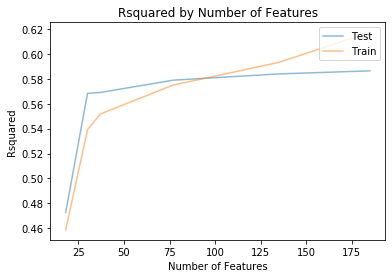

In [153]:
# full features model evaluation
X = Sea_List_fFeat.drop(columns=['price'])
y = Sea_List_fFeat.price
cutoffs = [5000, 2500, 1000, 100, 30, 15]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [154]:
# full features model evaluation: R-Squared
r2_scores_test,r2_scores_train

([0.4726392440022523,
  0.5683783088898697,
  0.569026040152706,
  0.5789242457704648,
  0.5839515151996282,
  0.5864167013812993],
 [0.4586351947824078,
  0.5390818335944729,
  0.5517324295667267,
  0.5750137145803942,
  0.5932109724232543,
  0.6174177633055966])

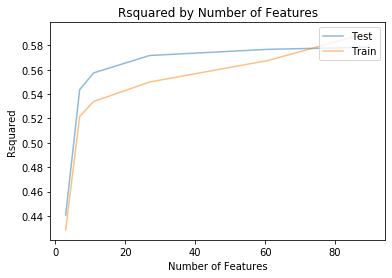

In [155]:
# fewer features model evaluation
X = Sea_List_sFeat.drop(columns=['price'])
y = Sea_List_sFeat.price
cutoffs =  [5000, 2500, 1000, 100, 30, 15]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [156]:
# fewer features model evaluation: R-Squared
r2_scores_test,r2_scores_train

([0.44074465154527365,
  0.5435729414688139,
  0.5573624860861177,
  0.5716250458005896,
  0.5766863534476272,
  0.5784611546601286],
 [0.4285975961127507,
  0.5216544041393726,
  0.5339180266244942,
  0.5498682931697871,
  0.5676088516002895,
  0.5906924631401994])

In [157]:
# in both full and fewer features models the test R-squared is about 58%

# Conclusion<a id="12"></a>

#### Analyzed Airbnb housing price in Seattle area
>found out that the high season is June, July and August for Seattle, while it is September and October for Boston.
Also observed the average neighbourhoods price to spot pricy neighborhoods. At the end two linear regression models used to predict the housing price: one with full features and one with fewer features, both shown similar results with an R-squared of 58%.  